# Santa Clara Airbnb Calendar Data Analysis and Visualization

In this analysis, I will take a look at the Airbnb calendar data on Santa Clara. The data set contains the availability and pricing information on all the Aribnb listings in Santa Clara from November 2019 to November 2020. I'd like to gain insights on the following questions from analyzing this dataset:

1. How does the Airbnb listing availability vary throughout the year?
2. 

## Set Up Notebook and Workspace

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
# Read data
df = pd.read_csv(
    'http://data.insideairbnb.com/united-states/ca/santa-clara-county/2019-11-07/data/calendar.csv.gz')

## Data Preparation

In [3]:
df.shape

(2795182, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795182 entries, 0 to 2795181
Data columns (total 7 columns):
listing_id        int64
date              object
available         object
price             object
adjusted_price    object
minimum_nights    float64
maximum_nights    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 149.3+ MB


In [5]:
df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,4952,2019-11-07,f,$75.00,$75.00,2.0,365.0
1,4952,2019-11-08,f,$75.00,$75.00,2.0,365.0
2,4952,2019-11-09,f,$75.00,$75.00,2.0,365.0
3,4952,2019-11-10,f,$75.00,$75.00,2.0,365.0
4,4952,2019-11-11,f,$75.00,$75.00,2.0,365.0


At the first glance, we need to perform the following conversion/manipulation on the original dataset before preceding to the next steps of our analysis:

- convert the `data` column to datetime format
- convert `price` and `adjusted_price` column from object to numerical columns
- convert the `available` column from object to boolean columns

In [6]:
# set date column as datetime
df['date'] = pd.to_datetime(df['date'])

In [7]:
# set price columns as float
df[['price', 'adjusted_price']] = df[['price', 'adjusted_price']
                                     ].replace('[^.0-9]', '', regex=True).astype(float)

In [8]:
# set available column as boolean
df['available'] = pd.get_dummies(
    df['available'], dtype=bool, drop_first=True, prefix='Available')

## Listing Availability Timeline

In [33]:
y1 = df.groupby('date')['available'].count()
y2 = df[df['available'] == False].groupby('date')['available'].count()
y3 = df[df['available'] == True].groupby('date')['available'].count()

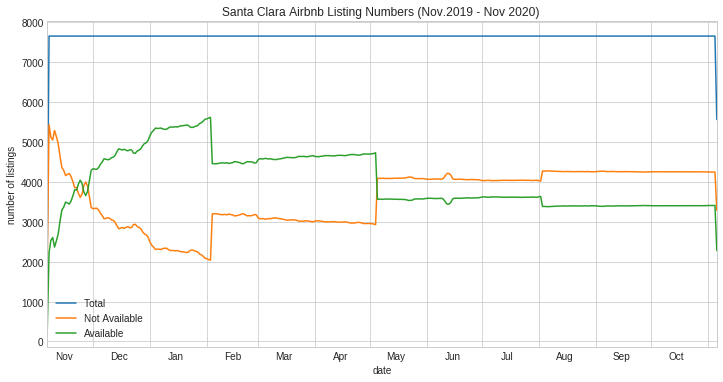

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))
y1.plot(ax=ax, label='Total')
y2.plot(ax=ax, label='Not Available')
y3.plot(ax=ax, label='Available')

ax.legend()

# Label the axes
ax.set(title='Santa Clara Airbnb Listing Numbers (Nov.2019 - Nov 2020) ',
       ylabel='number of listings')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

__Observation:__
- There are more available listings in the near future. This may suggest that the business travel demand is lower around year-end and beginning of the year when compared to the demand in May - October. 
- The total number of listings holds constant throughout the year due to they are the same listings on the record as of when the data/record was pulled in November 2019. The actual total number of listings may change through the year

## Pricing Trend Over the Next 12 Months

Next, we will look at average listing price during the same period.

In [39]:
y = df.groupby('date')['price'].mean()

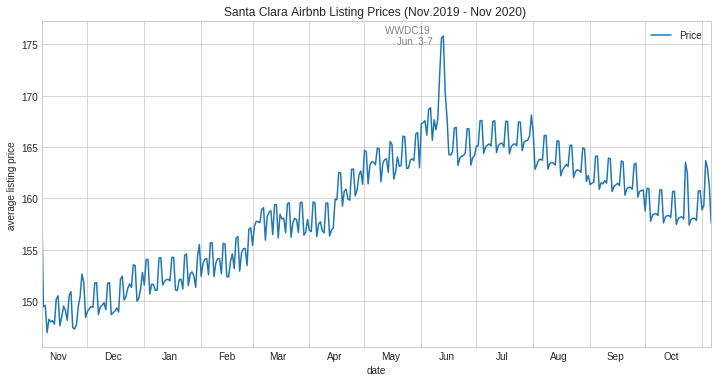

In [112]:
fig, ax = plt.subplots(figsize=(12, 6))
y.plot(ax=ax, label='Price')

ax.legend()

# Label the axes
ax.set(title='Santa Clara Airbnb Listing Prices (Nov.2019 - Nov 2020) ',
       ylabel='average listing price')

# Add lables to the plot
style = dict(size=10, color='gray')

ax.text('2020-06-07', 175, 'WWDC19 \n Jun. 3-7', ha='right', **style)


# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

__Obeservations:__
- The average listing prices are lower during the winter months and spiked in June.
- The higher demand in summer time (less available listings) correlates with the increasing prices during the same time period.
- Noticebally, the average listing price in Santa Clara spikes on the 2nd weekend of June in 2020. This is right around when the WWDC19 will be taking place in San Jose and thousands of developers and scholars from the globe attending this annual event hosted by Apple likely are driving the demand for hospitality in the area.

In [53]:
# top 10 most expensive days
df.groupby('date')['price'].mean().sort_values(ascending=False).head(10)

date
2020-06-13    175.793810
2020-06-12    175.620136
2020-06-11    172.058109
2020-06-14    170.339645
2020-06-06    168.825150
2020-06-05    168.668843
2020-07-31    168.112954
2020-06-15    167.878950
2020-06-10    167.769000
2020-06-08    167.655393
Name: price, dtype: float64

## Weekday vs Weekend

Finally, we will take a look at the Airbnb demand and pricing trend in Santa Clara during weekdays vs. weekends. 

In [67]:
idx = ['Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday']
price_dow = df.groupby('day_name')['price'].mean().reindex(idx)
price_dow

day_name
Sunday       157.481106
Monday       158.312127
Tuesday      158.627742
Wednesday    158.756419
Thursday     158.333687
Friday       160.662589
Saturday     160.693327
Name: price, dtype: float64

In [74]:
btotal_avail = df.groupby('day_name')['available'].count().reindex(idx)

avail_dow = avail/total_avail
avail_dow

day_name
Sunday       0.530112
Monday       0.530441
Tuesday      0.527616
Wednesday    0.524901
Thursday     0.524109
Friday       0.522920
Saturday     0.527033
Name: available, dtype: float64

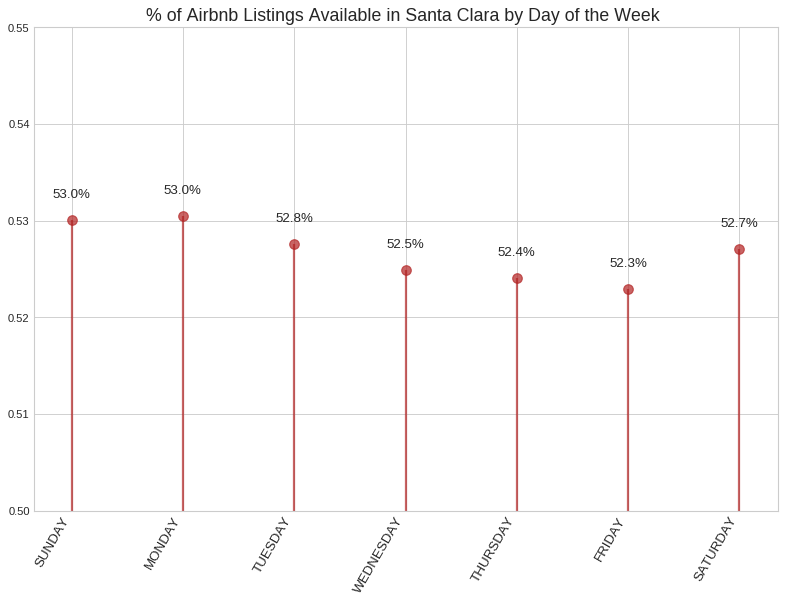

In [116]:
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
ax.vlines(x=avail_dow.index, ymin=0, ymax=avail_dow,
          color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=avail_dow.index, y=avail_dow, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('% of Airbnb Listings Available in Santa Clara by Day of the Week ',
             fontdict={'size': 16})
ax.set_xticklabels(avail_dow.index.str.upper(), rotation=60, fontdict={
                   'horizontalalignment': 'right', 'size': 12})
ax.set_ylim(0.5, 0.55)

# Annotate
for idx in avail_dow.index:
    ax.text(idx, avail_dow[idx]+0.002, s="{:.1%}".format(avail_dow[idx]),
            horizontalalignment='center', verticalalignment='bottom', fontsize=12)

price_df

In [122]:
idx = ['Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday']
price = df[df['available'] == True].groupby(
    'day_name')['price'].mean().reindex(idx)

day_name
Sunday       174.455890
Monday       175.824760
Tuesday      176.224374
Wednesday    176.543875
Thursday     175.841234
Friday       179.402273
Saturday     179.237425
Name: price, dtype: float64

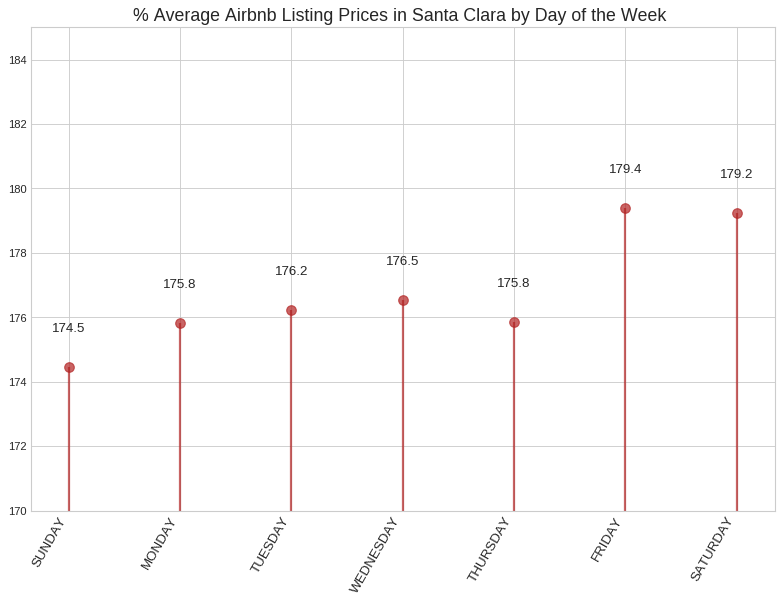

In [132]:
# Plot
fig, ax = plt.subplots(figsize=(12, 8), dpi=80)
ax.vlines(x=price.index, ymin=0, ymax=price_df,
          color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=price.index, y=price, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('% Average Airbnb Listing Prices in Santa Clara by Day of the Week',
             fontdict={'size': 16})
ax.set_xticklabels(price.index.str.upper(), rotation=60, fontdict={
                   'horizontalalignment': 'right', 'size': 12})
ax.set_ylim(170, 185)

# Annotate
for i in price.index:
    ax.text(i, price[i]+1, s=round(price[i], 1),
            horizontalalignment='center', verticalalignment='bottom', fontsize=12)

price_df